### Final project of Complex Network Analysis
### Majid Adibian, 402131910


In [1]:
!pip install torch_geometric

In [2]:
import torch
import time
from torch_geometric.nn import GATConv, GATv2Conv

from Q1.utils import get_datasets, show_data_info, split_data
from Q1.train import evaluate_model, train_model, plot_accuracy
from Q1.model import MLP, GCNModel, GATModel

seed = 43
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True

ImportError: cannot import name 'get_datasets' from 'Q1.utils' (/mnt/hdd1/adibian/Education/Complex/HW3/Q1/utils.py)

## Question 1.A

#### Load datasets and show some information

In [2]:
CoraFull_dataset, CiteSeer_dataset = get_datasets()
show_data_info([CoraFull_dataset, CiteSeer_dataset])
CoraFull_dataset, CiteSeer_dataset = split_data([CoraFull_dataset, CiteSeer_dataset])

dataset name: cora
Number of nodes: 19793
Number of edges: 126842
Number of classes: 70
Number of features: 8710

dataset name: CiteSeer
Number of nodes: 3327
Number of edges: 9104
Number of classes: 6
Number of features: 3703



## Question 1.B

#### Find best number of linear layers in MLP network

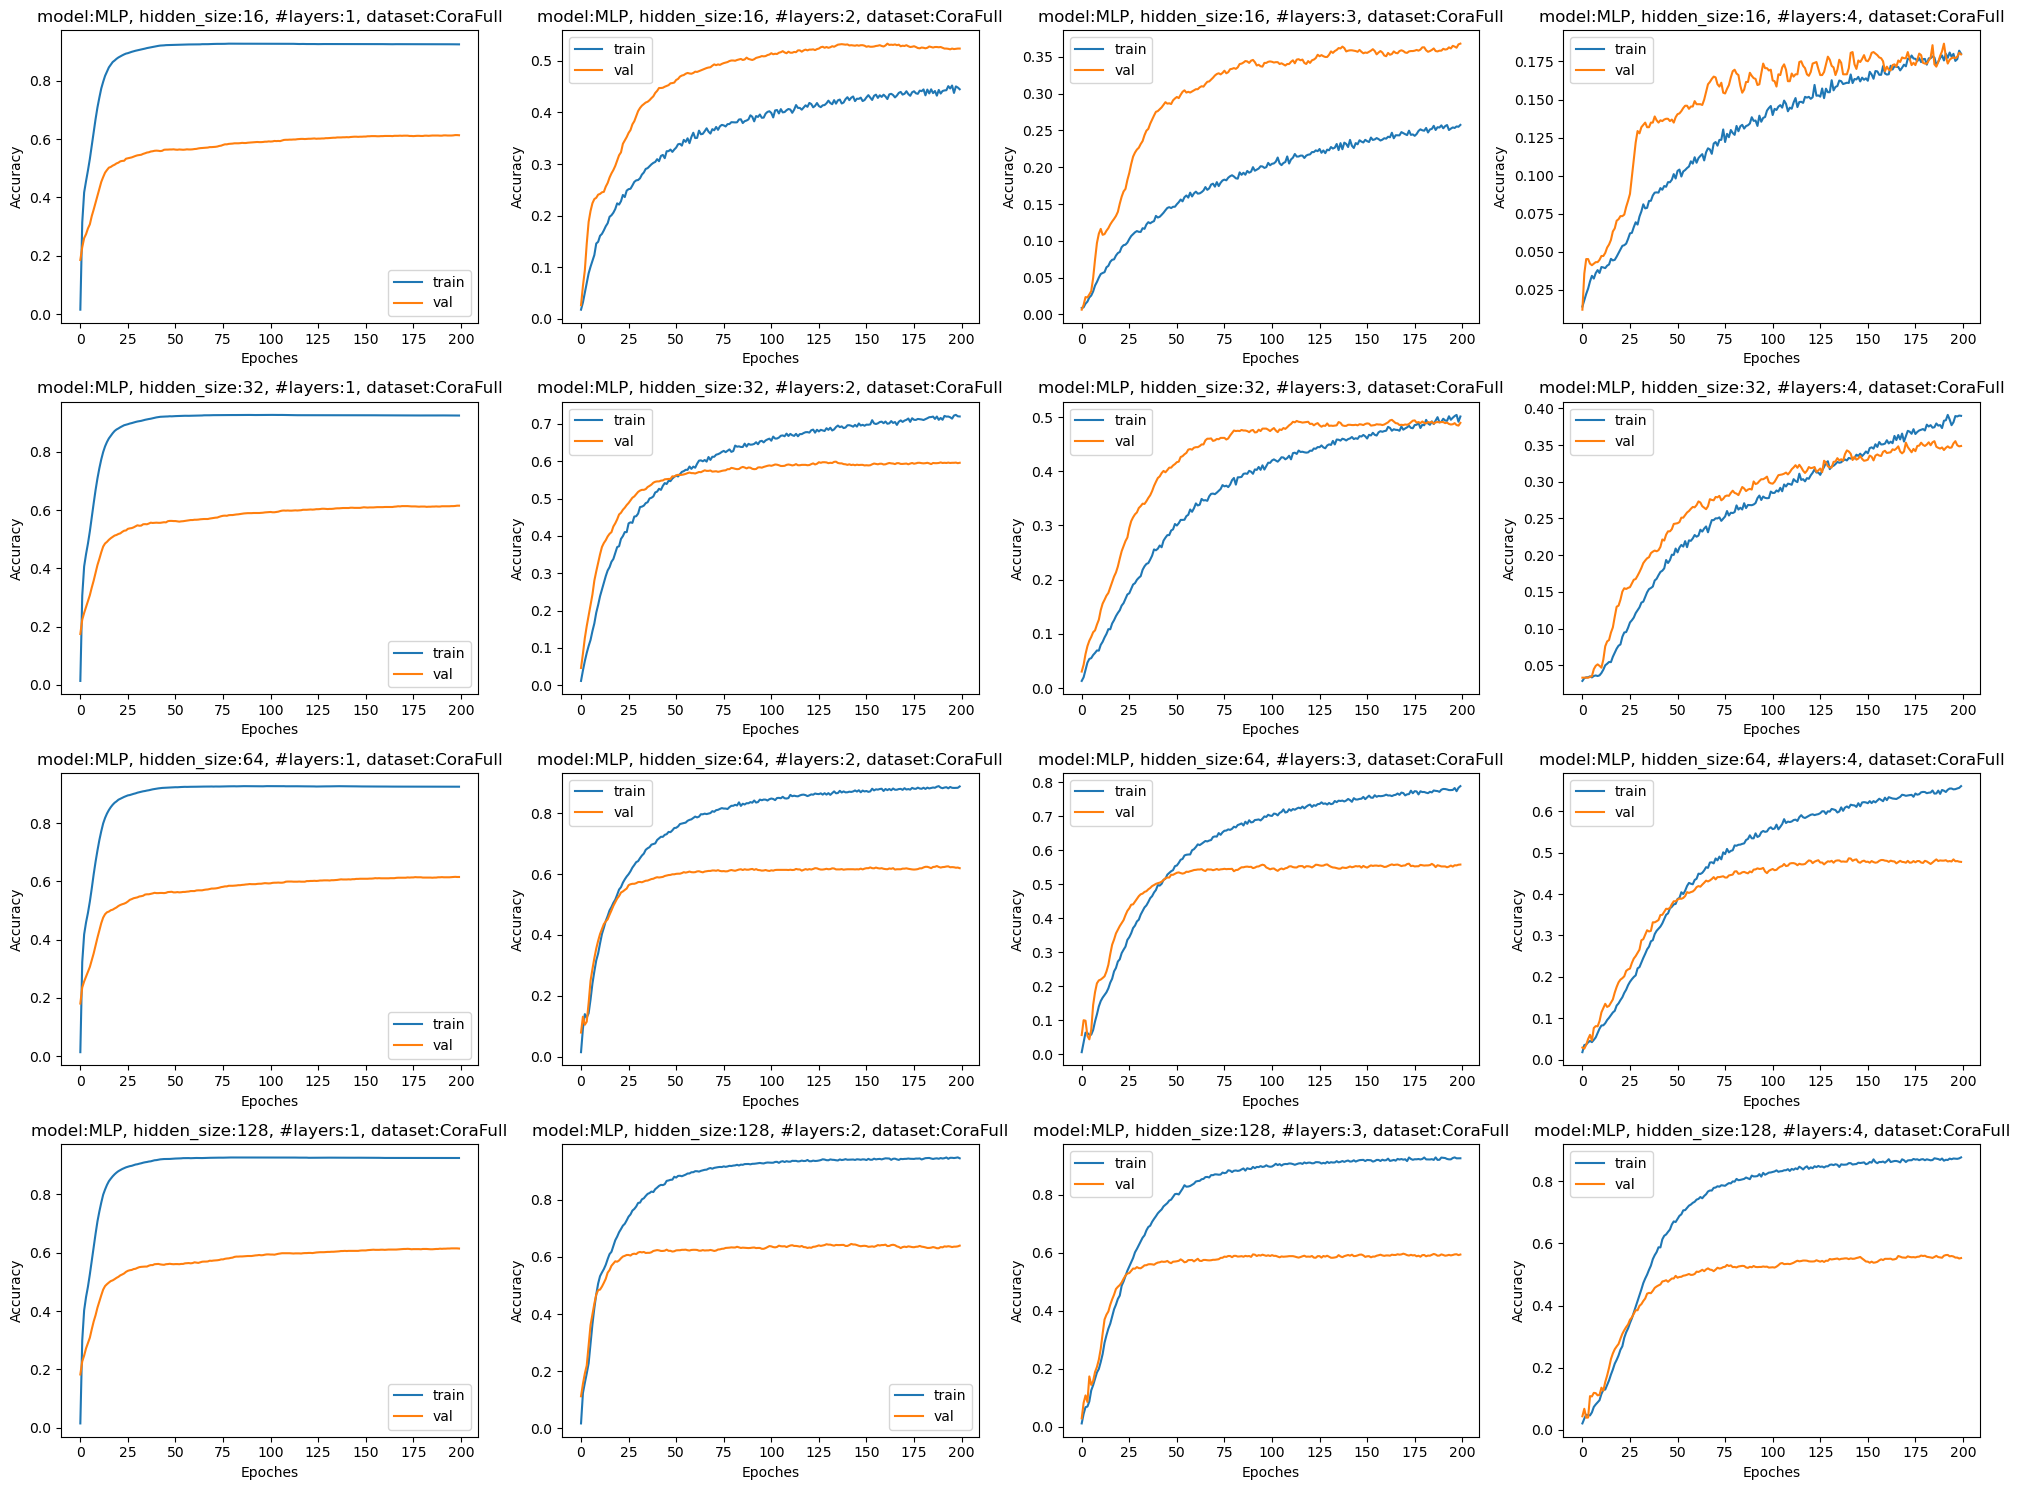

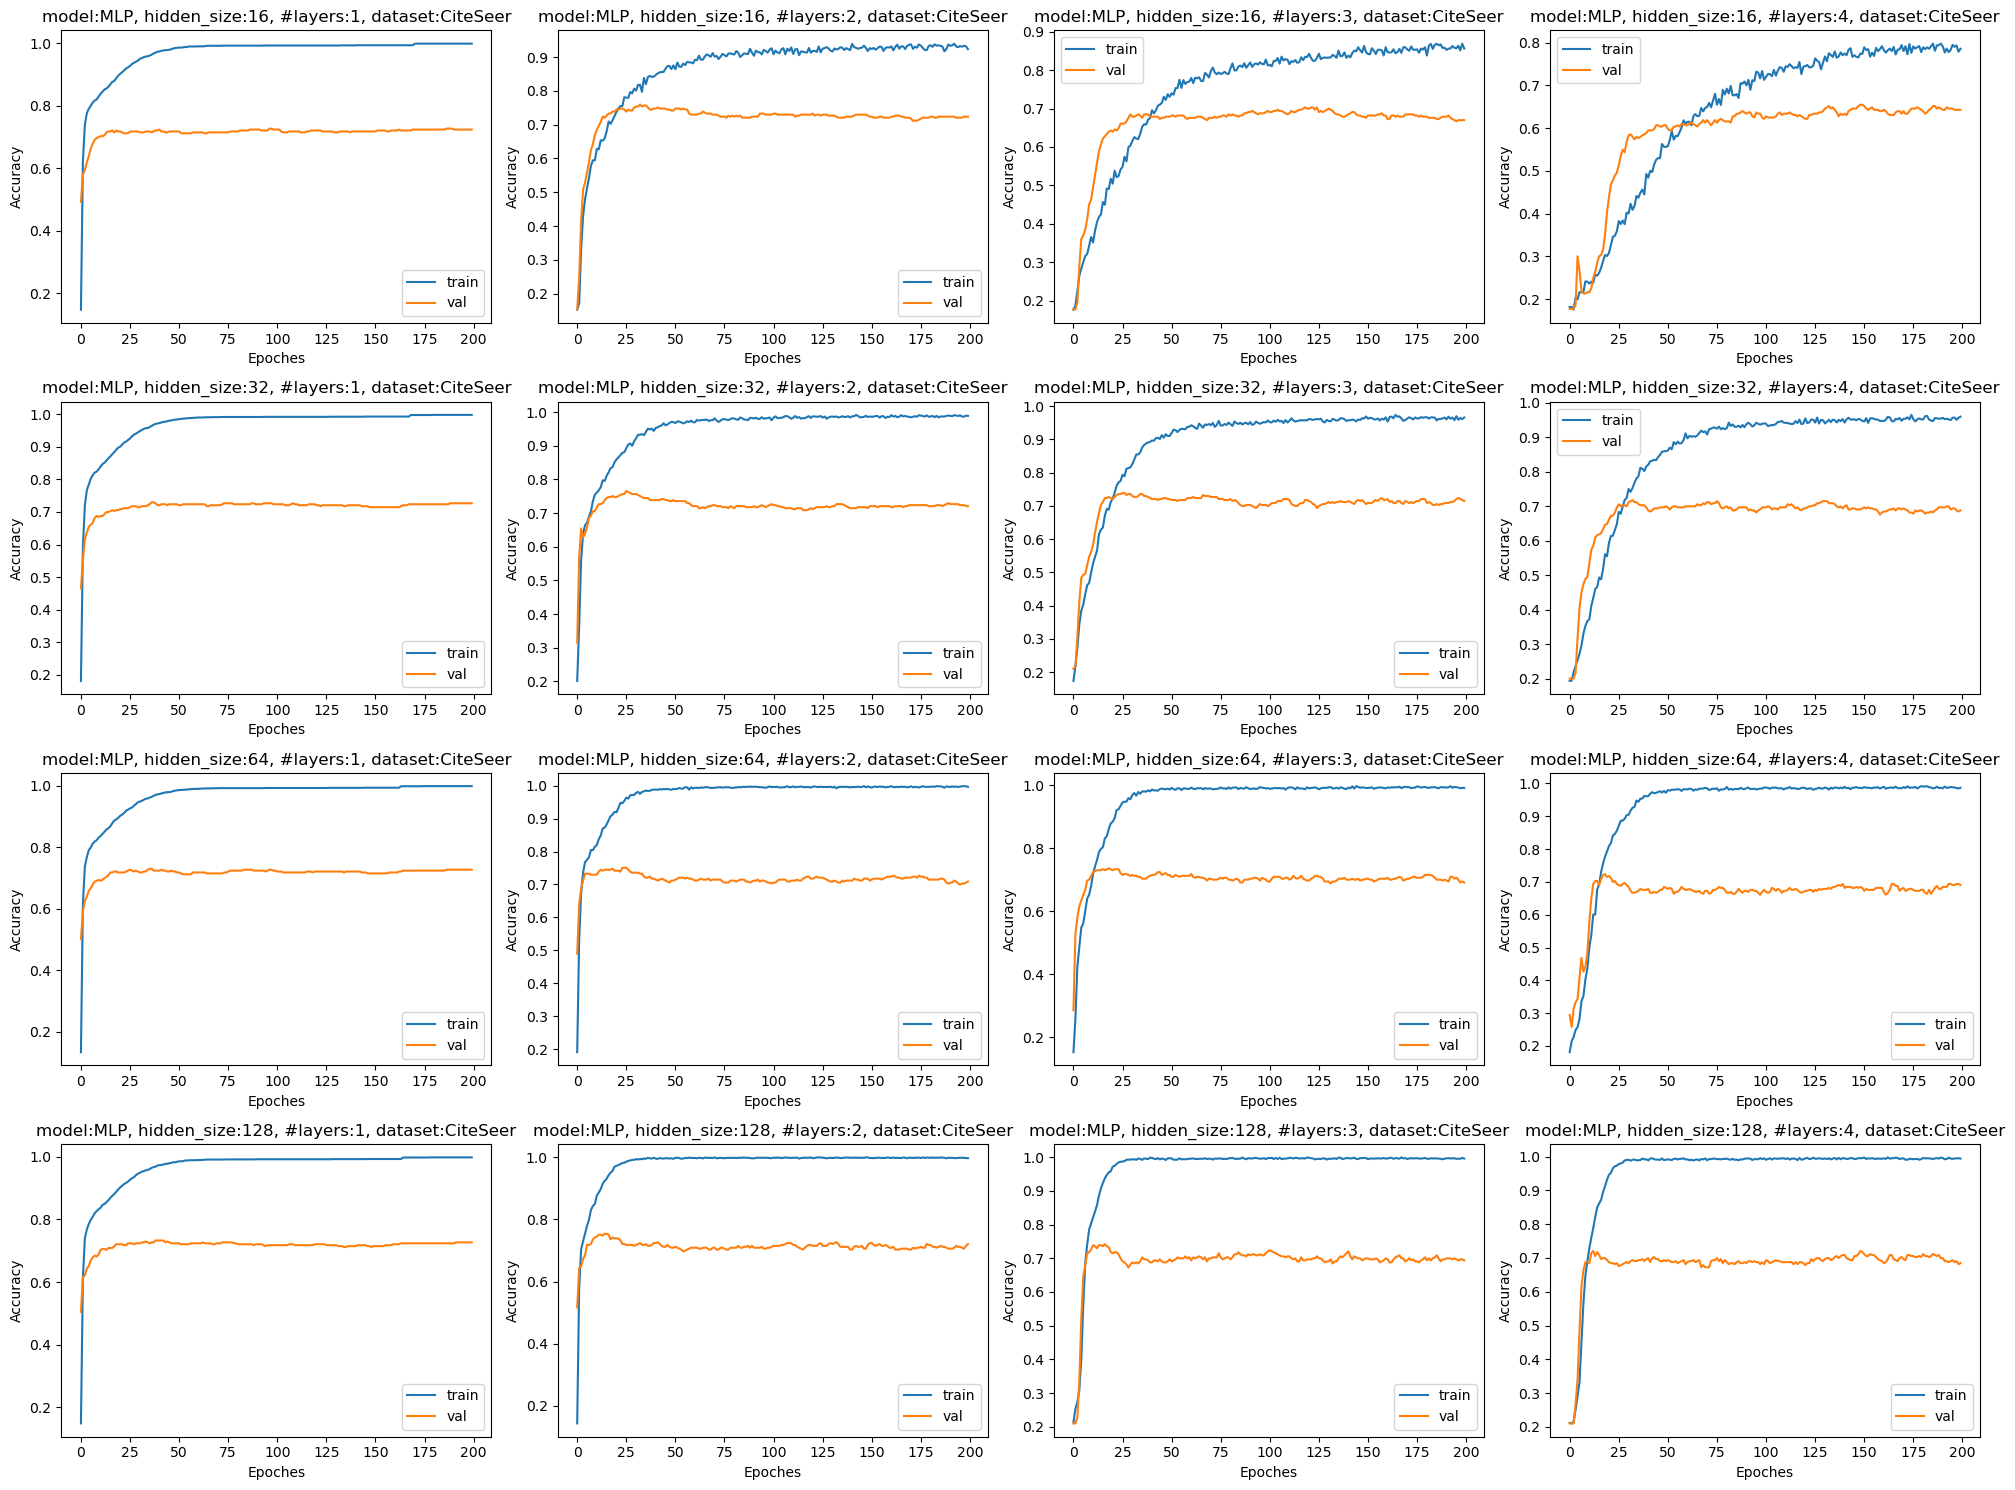

In [29]:
device = "cuda"
for name, dataset in [("CoraFull", CoraFull_dataset), ("CiteSeer", CiteSeer_dataset)]:
    all_plot_data = []
    for i in range(4):
        hidden_size = 2**(4+i)
        for num_layers in range(1,5):
            model = MLP(dataset["nodes"].shape[1], dataset["num_classes"], num_layers, hidden_size).to(device)
            _, train_accuracy, val_accuracy = train_model(model, dataset, device=device, epoches=200)
            plot_data = {"title": f"model:MLP, hidden_size:{hidden_size}, #layers:{num_layers}, dataset:{name}", "data":[{"accuracy": train_accuracy, "name":"train"}, {"accuracy": val_accuracy, "name":"val"}]}
            all_plot_data.append(plot_data)
    plot_accuracy(all_plot_data, num_rows=4, num_cols=4, figure_size=(20, 15))

#### Find accuracy of the best model on test dataset

In [7]:
## test best model
device = "cuda"
CoraFull_best_num_layers, CiteSeer_best_num_layers = 2, 2
CoraFull_best_hidden_size, CiteSeer_best_hidden_size = 128, 64
loop = [("CoraFull", CoraFull_dataset, CoraFull_best_num_layers, CoraFull_best_hidden_size), ("CiteSeer", CiteSeer_dataset, CiteSeer_best_num_layers, CiteSeer_best_hidden_size)]
for name, dataset, best_num_layer, best_hidden_size in loop:
    print(f"Dataset {name}")
    model = MLP(dataset["nodes"].shape[1], dataset["num_classes"], best_num_layer, best_hidden_size).to(device)
    t1 = time.time()
    model, _, _ = train_model(model, dataset, device=device)
    train_time = time.time() - t1
    test_indexes = dataset["test_indexes"]
    data = {"nodes":dataset["nodes"].to(device), "edges":dataset["edges"].to(device), "labels":dataset["labels"].to(device)}
    t1 = time.time()
    test_accuracy = evaluate_model(model, data, test_indexes)
    inference_time = time.time() - t1
    print("\t accuracy: {:.4f}".format(test_accuracy))
    print("\t train time: {:.4f} s".format(train_time))
    print("\t inference time: {:.4f} s".format(inference_time))

Dataset CoraFull


	 accuracy: 0.6285
	 train time: 1.5895 s
	 inference time: 0.0038 s
Dataset CiteSeer
	 accuracy: 0.7081
	 train time: 0.1513 s
	 inference time: 0.0004 s


## Question 1.C

#### Find best number of layers and hidden size for GCN model

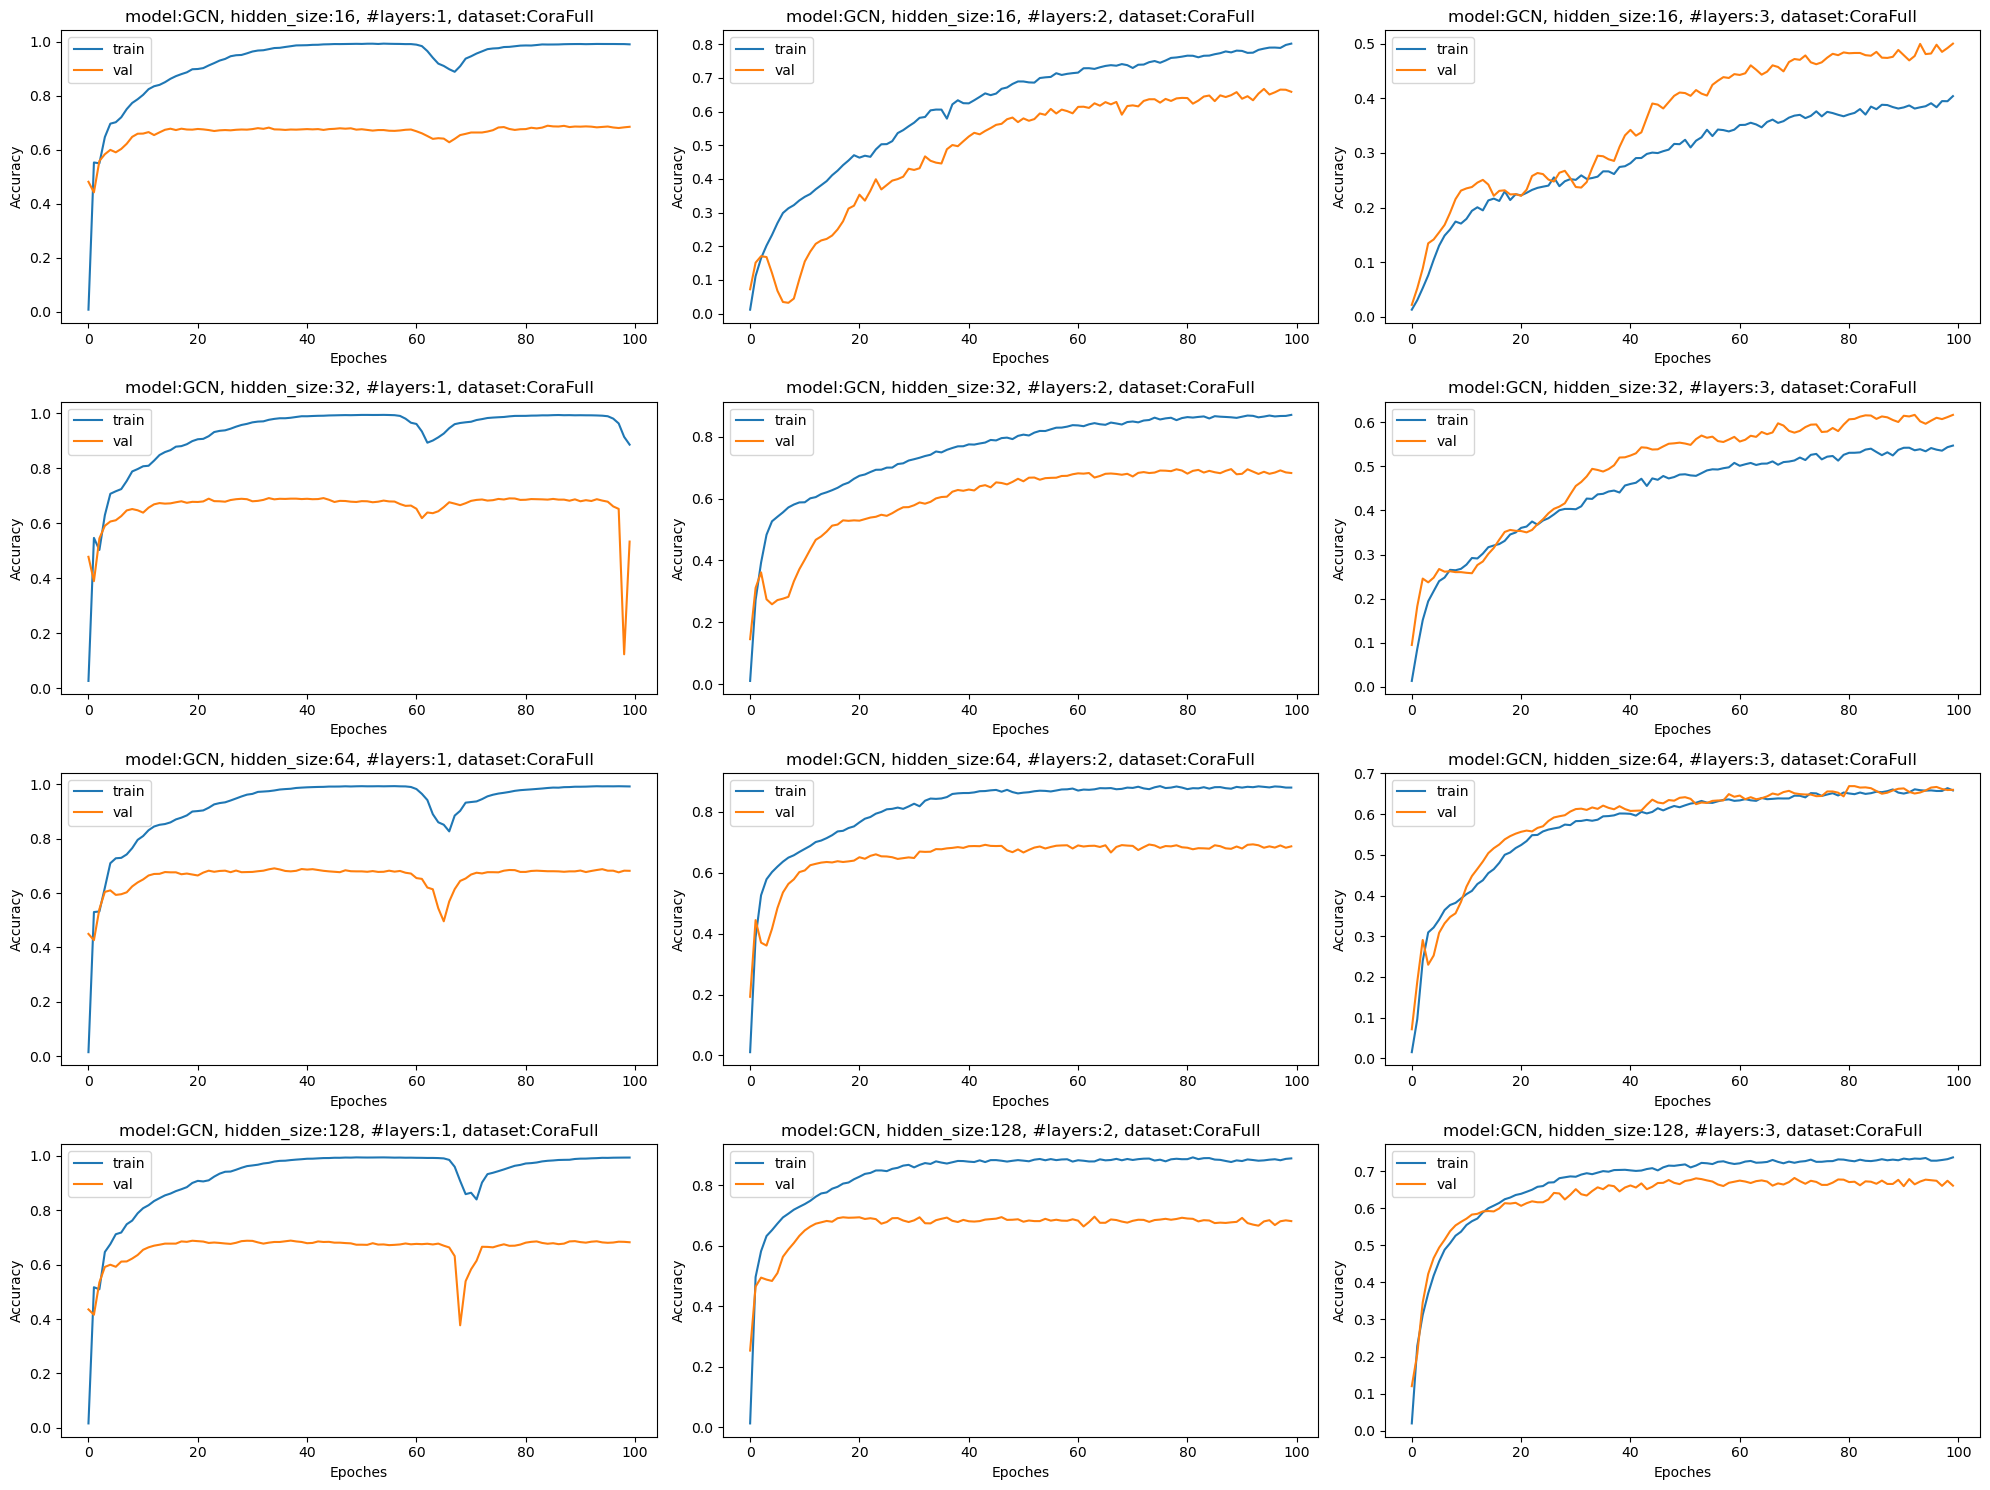

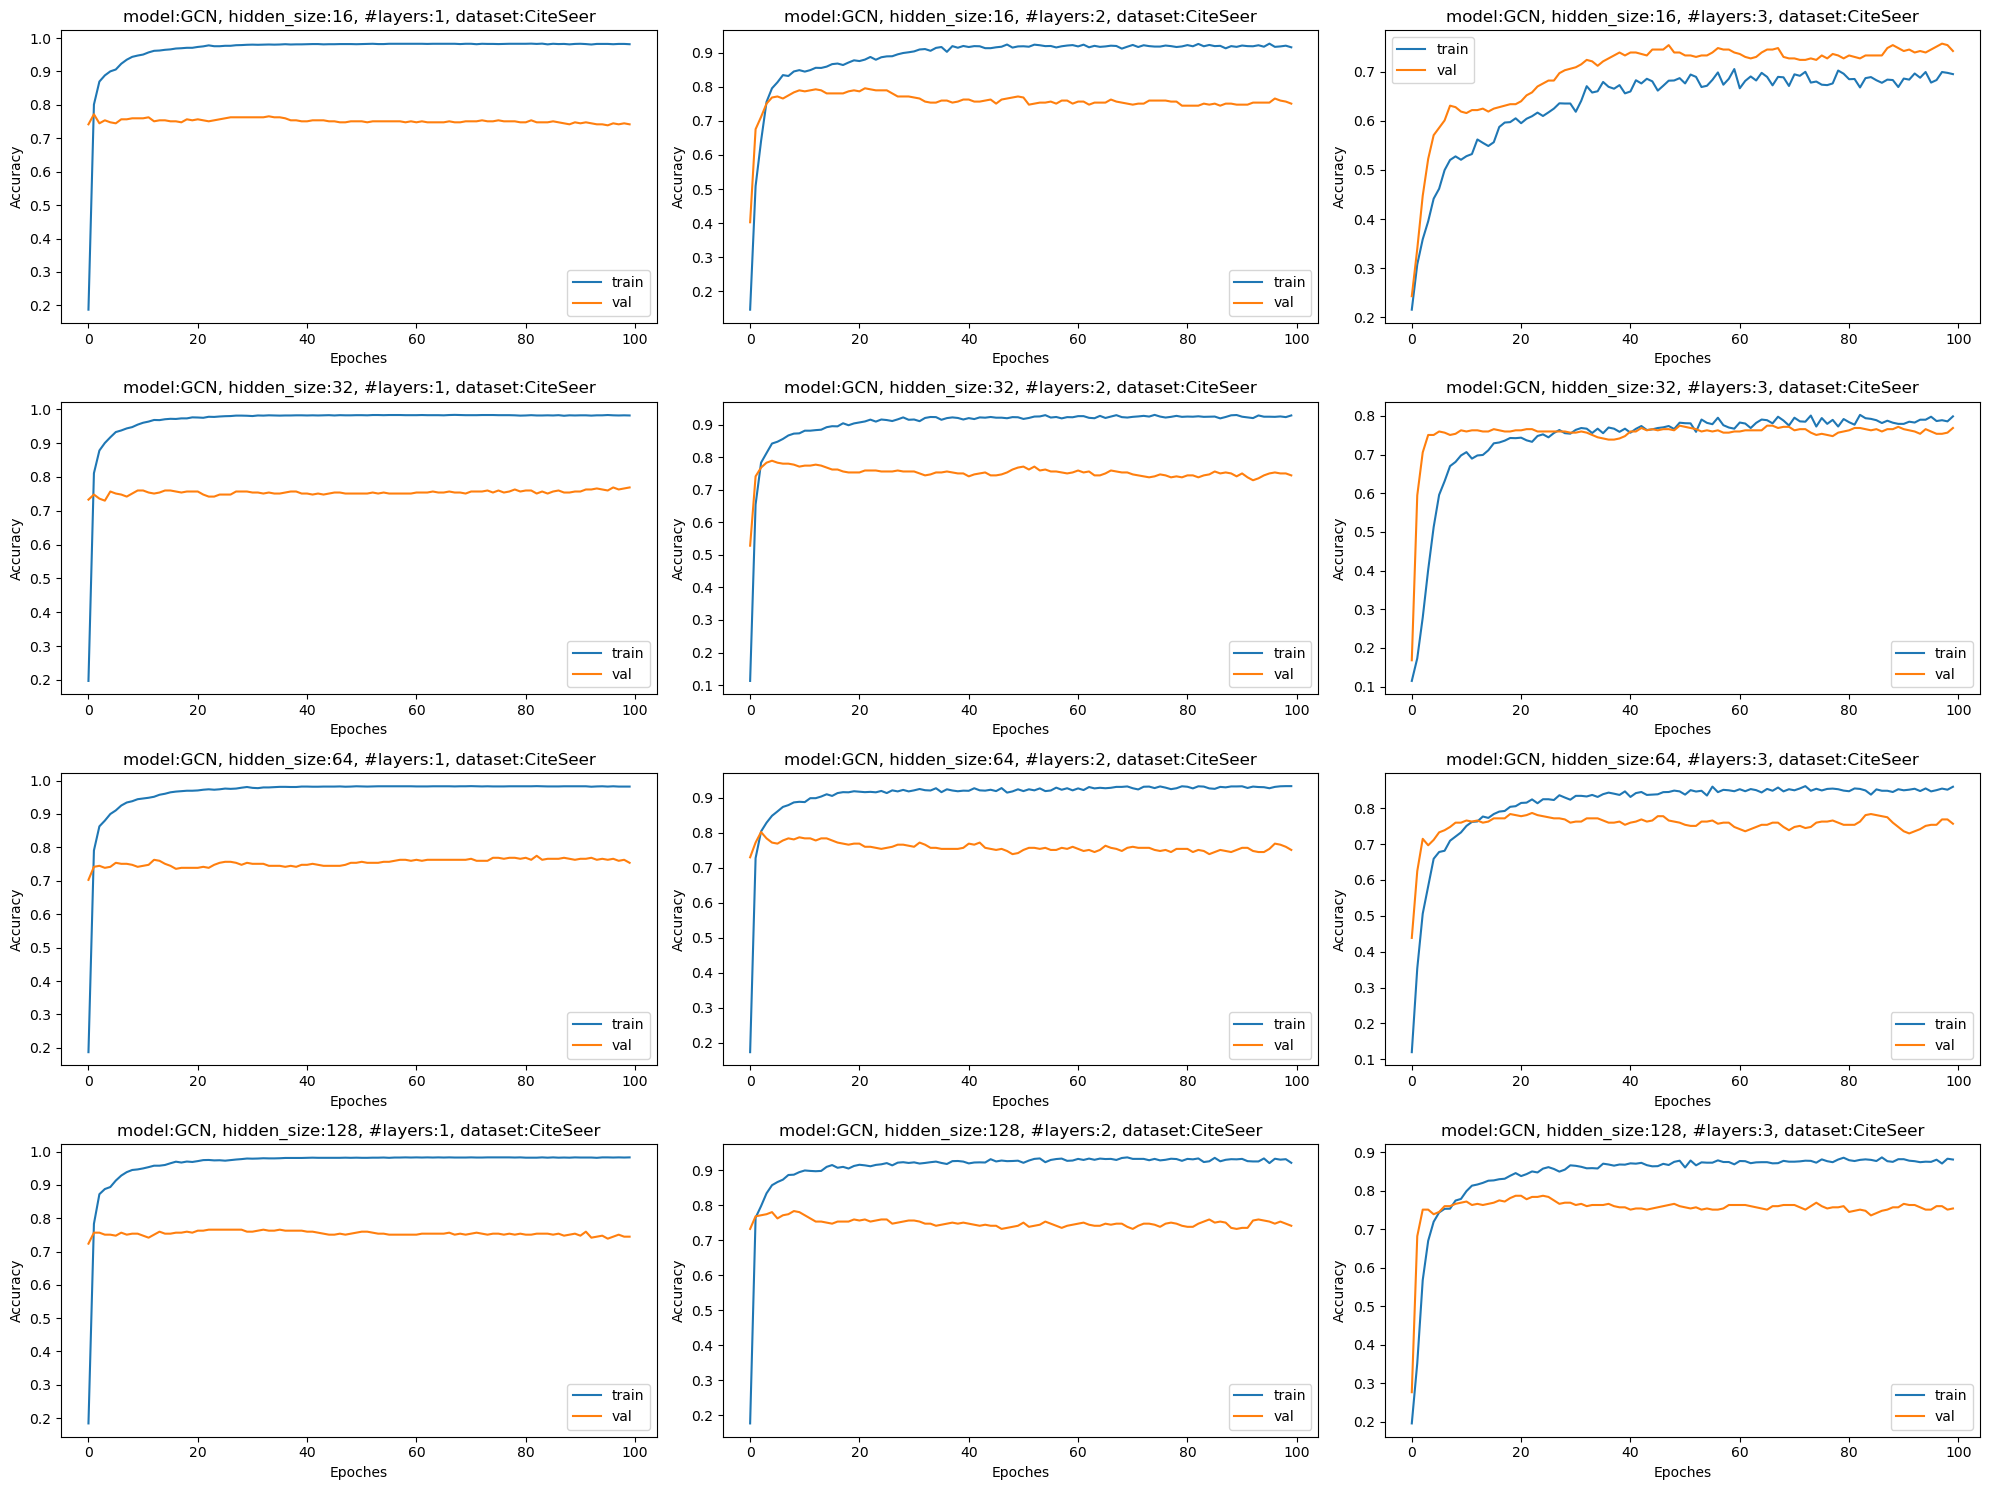

In [38]:
device = "cuda"
for name, dataset in [("CoraFull", CoraFull_dataset), ("CiteSeer", CiteSeer_dataset)]:
    all_plot_data = []
    for i in range(4):
        hidden_size = 2**(4+i)
        for num_layers in range(1,4):
            model = GCNModel(dataset["nodes"].shape[1], dataset["num_classes"], hidden_size, num_layers).to(device)
            _, train_accuracy, val_accuracy = train_model(model, dataset, device=device)
            plot_data = {"title": f"model:GCN, hidden_size:{hidden_size}, #layers:{num_layers}, dataset:{name}", "data":[{"accuracy": train_accuracy, "name":"train"}, {"accuracy": val_accuracy, "name":"val"}]}
            all_plot_data.append(plot_data)
    plot_accuracy(all_plot_data, num_rows=4, num_cols=3, figure_size=(20, 15))

#### Find accuracy of the best model on test dataset

In [6]:
## test best model
device = "cuda"
CoraFull_best_num_layers, CiteSeer_best_num_layers = 3, 3
CoraFull_best_hidden_size, CiteSeer_best_hidden_size = 64, 32
loop = [("CoraFull", CoraFull_dataset, CoraFull_best_num_layers, CoraFull_best_hidden_size), ("CiteSeer", CiteSeer_dataset, CiteSeer_best_num_layers, CiteSeer_best_hidden_size)]
for name, dataset, best_num_layer, best_hidden_size in loop:
    model = GCNModel(dataset["nodes"].shape[1], dataset["num_classes"], best_hidden_size, best_num_layer).to(device)
    t1 = time.time()
    model, _, _ = train_model(model, dataset, device=device)
    train_time = time.time() - t1
    test_indexes = dataset["test_indexes"]
    data = {"nodes":dataset["nodes"].to(device), "edges":dataset["edges"].to(device), "labels":dataset["labels"].to(device)}
    t1 = time.time()
    test_accuracy = evaluate_model(model, data, test_indexes)
    inference_time = time.time() - t1
    print("\t accuracy: {:.4f}".format(test_accuracy))
    print("\t train time: {:.4f} s".format(train_time))
    print("\t inference time: {:.4f} s".format(inference_time))

	 accuracy: 0.6792
	 train time: 66.5331 s
	 inference time: 0.2256 s
	 accuracy: 0.7410
	 train time: 2.7916 s
	 inference time: 0.0087 s


## Question 1.C

#### Find best number of layers and hidden size for GAT model

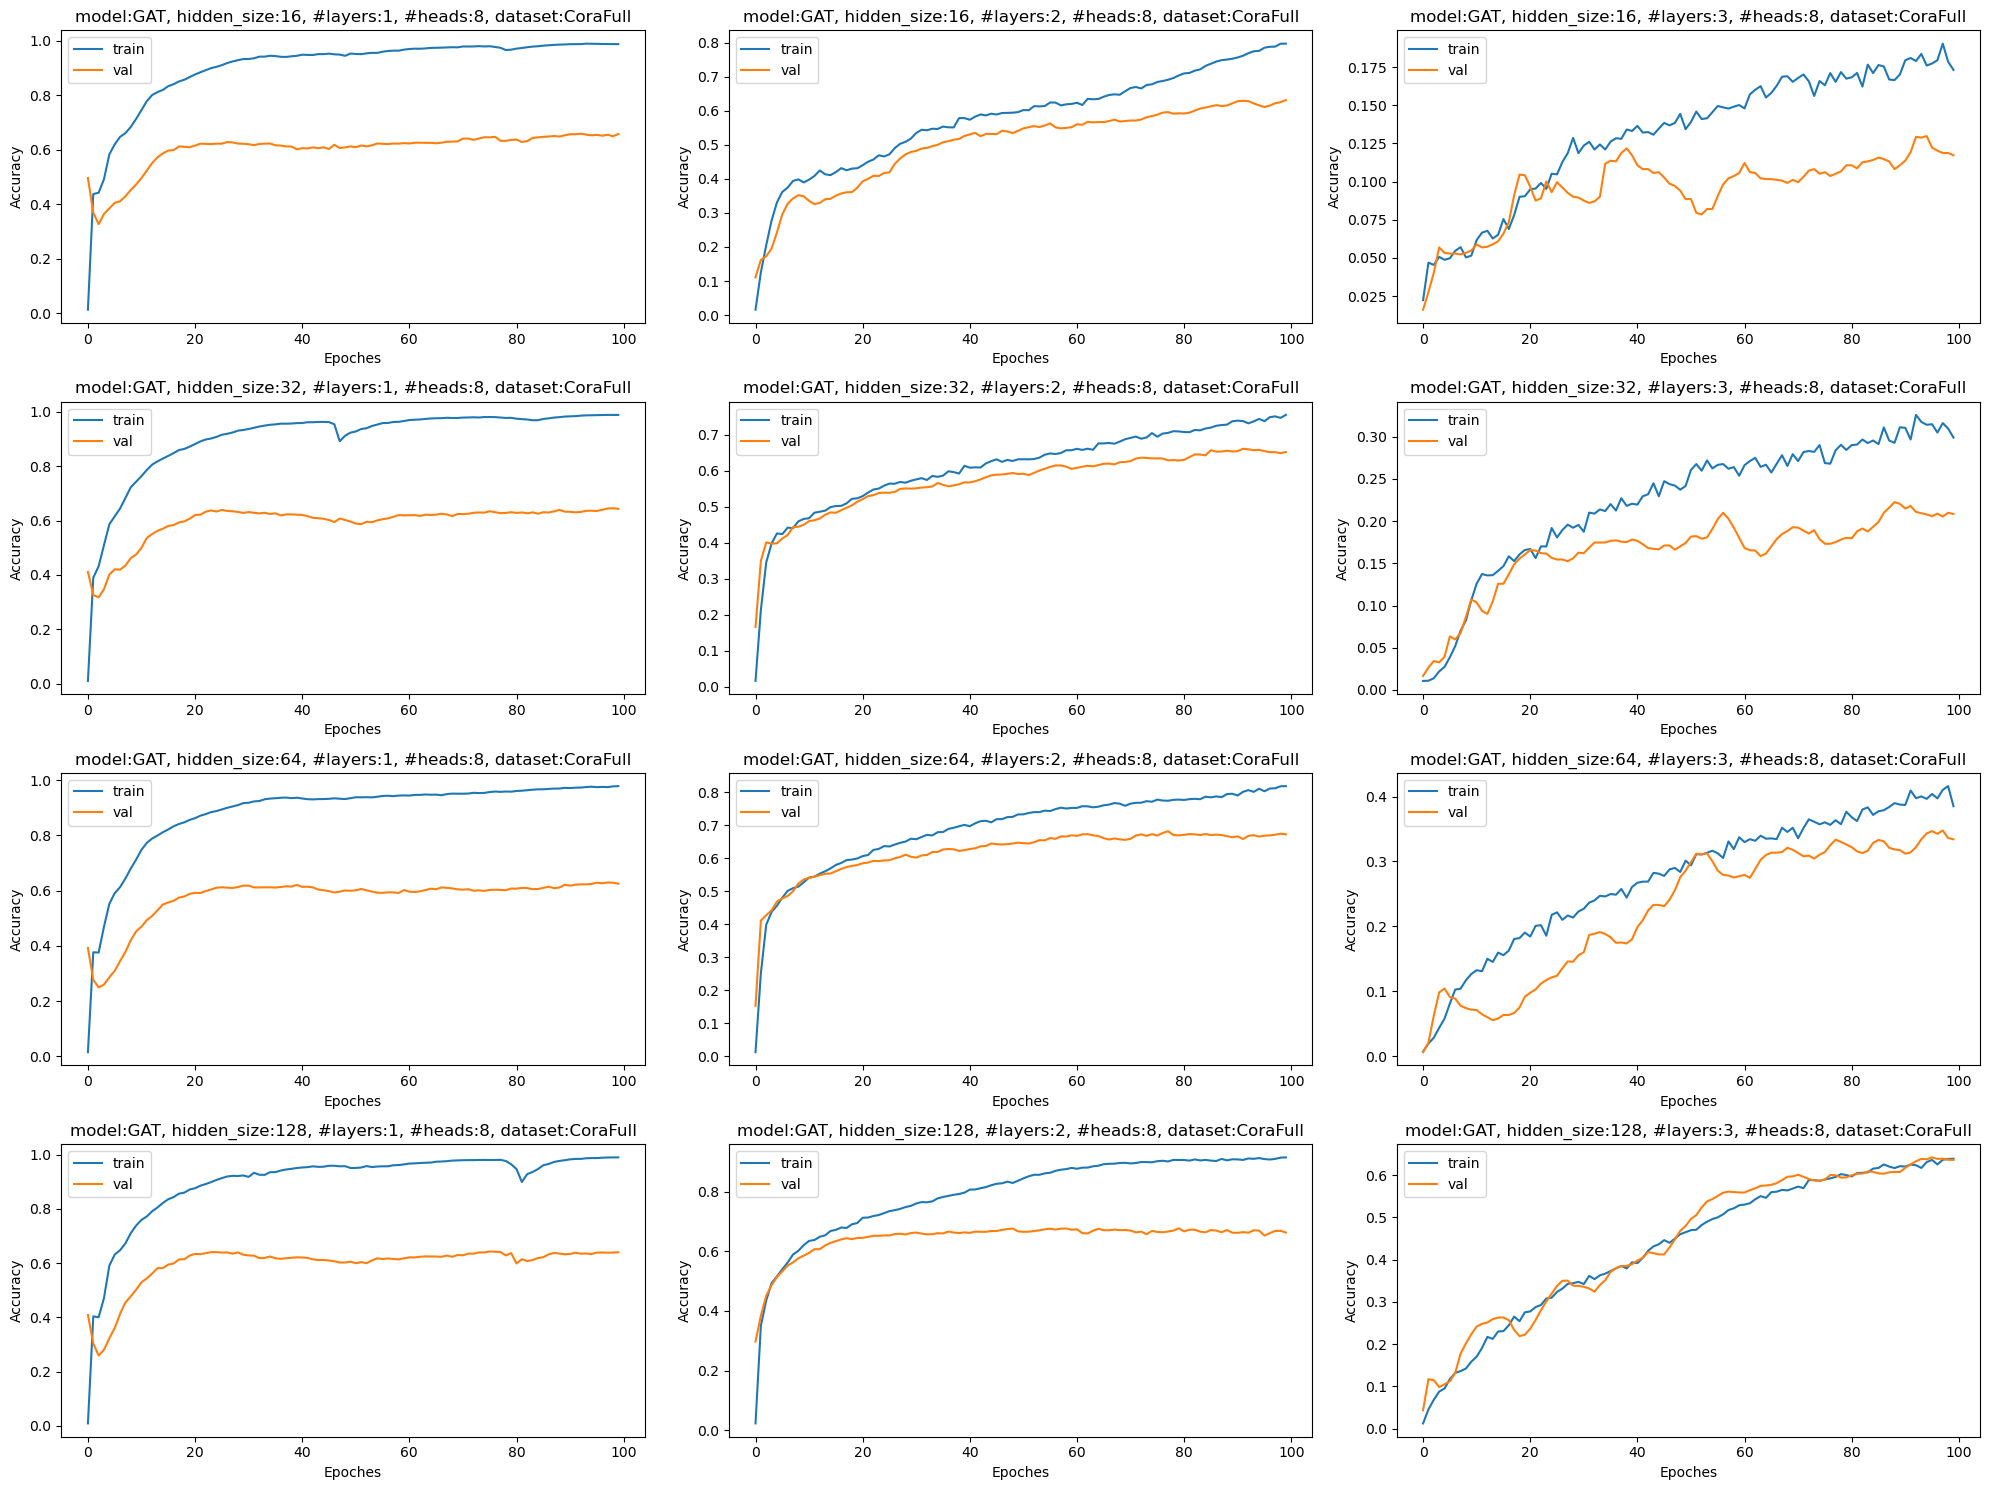

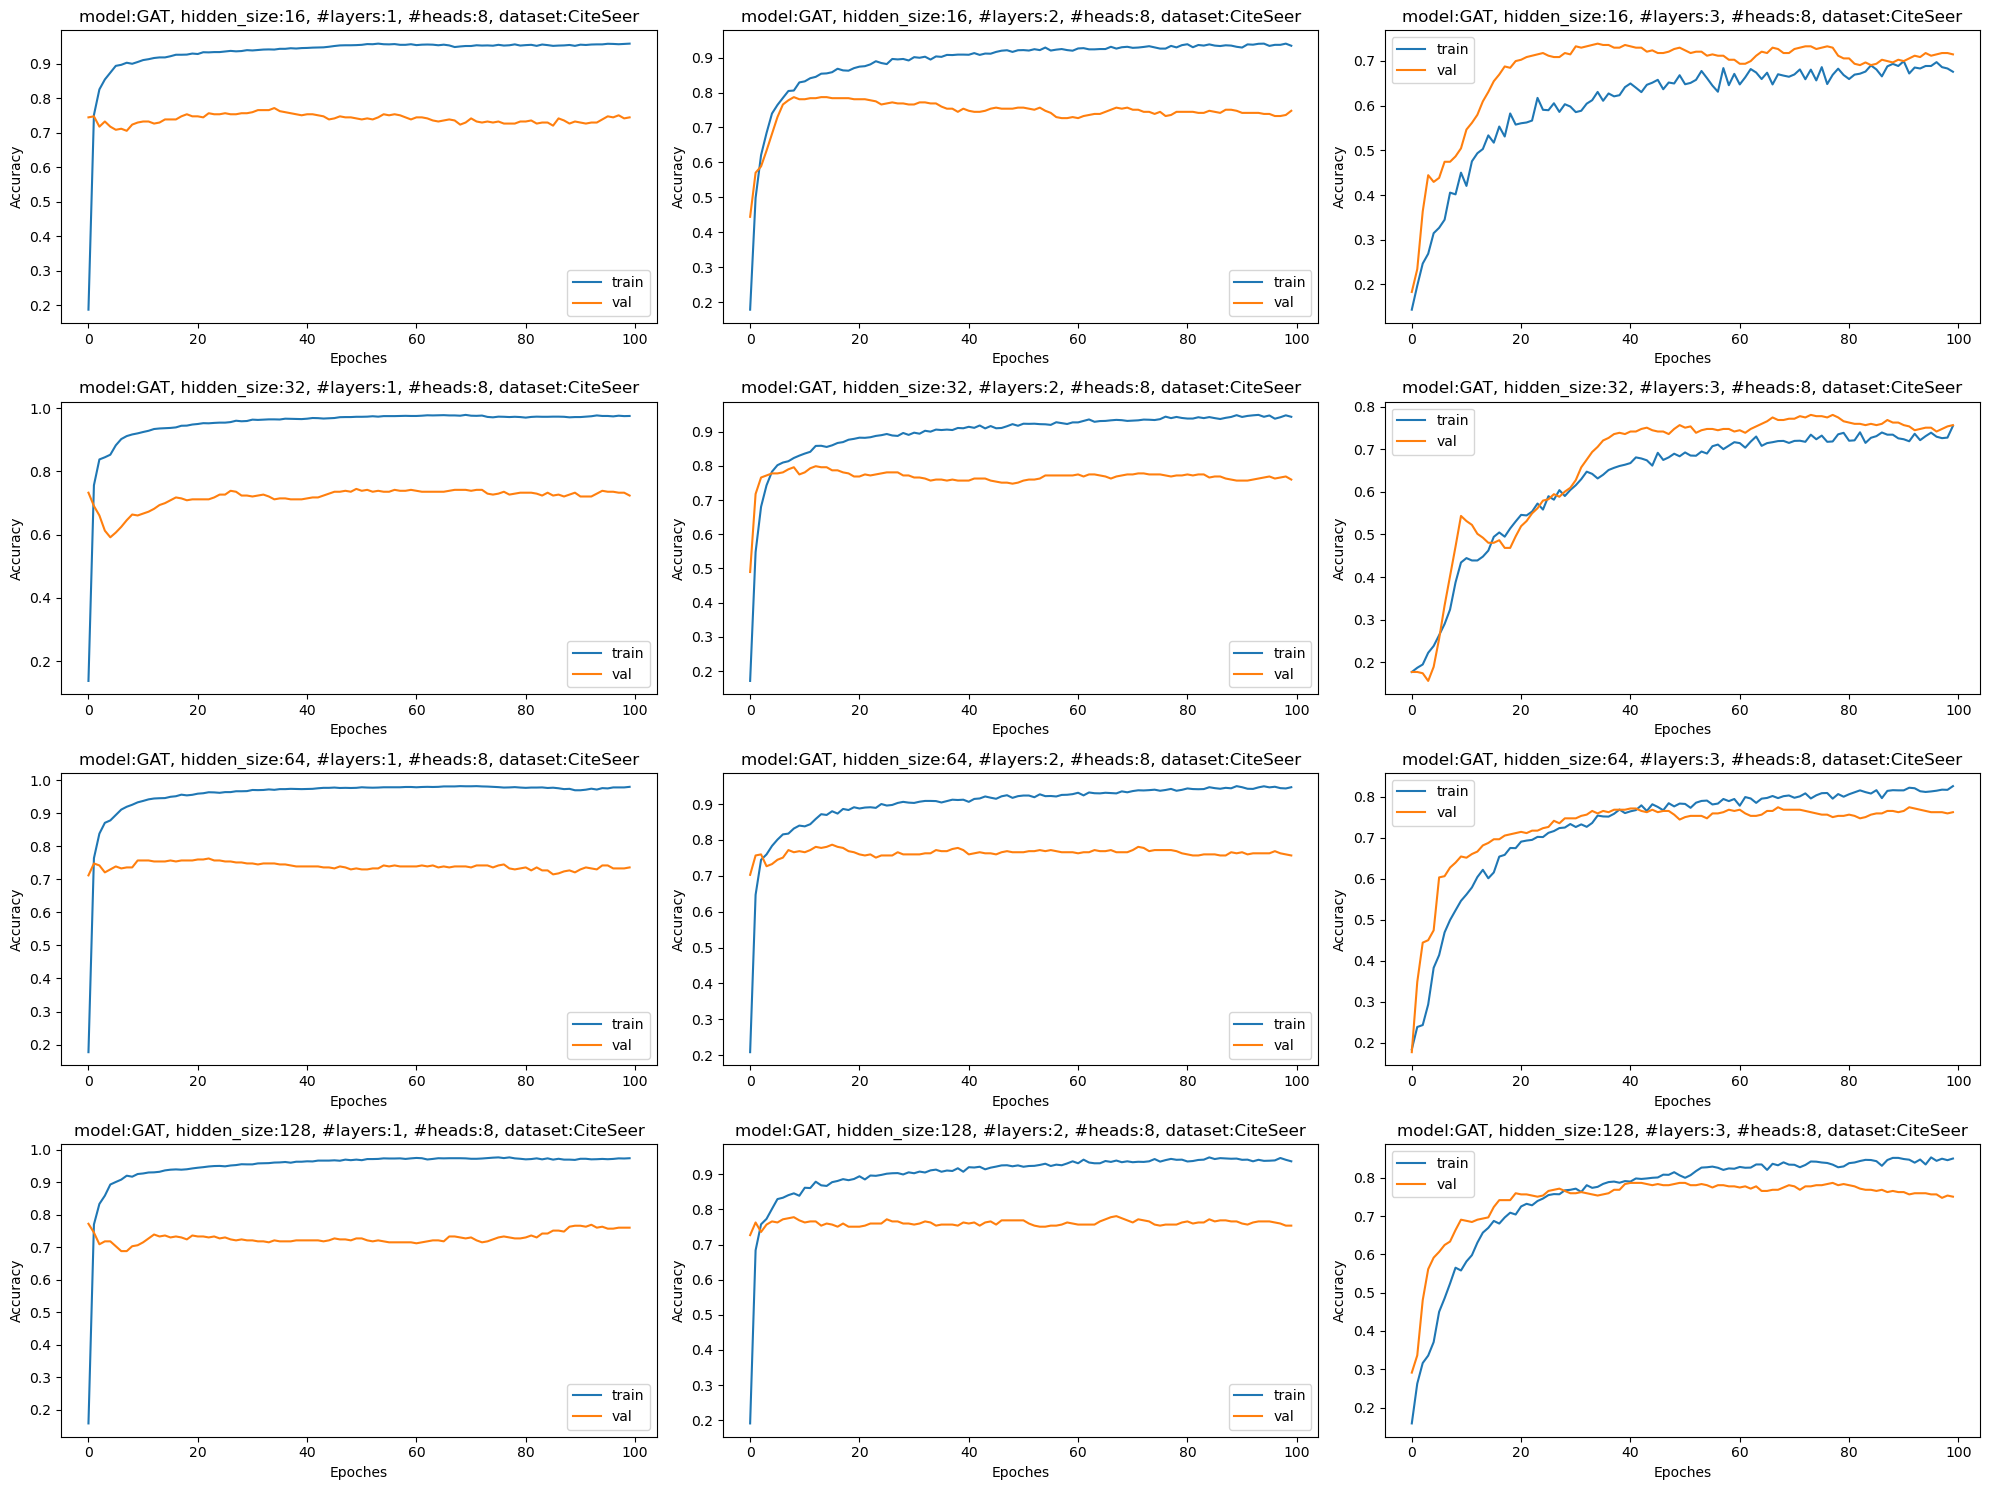

In [52]:
device = "cuda"
GAT_class = GATConv
num_heads = 8
for name, dataset in [("CoraFull", CoraFull_dataset), ("CiteSeer", CiteSeer_dataset)]:
    all_plot_data = []
    for i in range(4):
        hidden_size = 2**(4+i)
        for num_layers in range(1,4):
            model = GATModel(GAT_class, dataset["nodes"].shape[1], dataset["num_classes"], hidden_size, num_layers, num_heads=num_heads).to(device)
            _, train_accuracy, val_accuracy = train_model(model, dataset, device=device)
            plot_data = {"title": f"model:GAT, hidden_size:{hidden_size}, #layers:{num_layers}, #heads:{num_heads}, dataset:{name}", "data":[{"accuracy": train_accuracy, "name":"train"}, {"accuracy": val_accuracy, "name":"val"}]}
            all_plot_data.append(plot_data)
    plot_accuracy(all_plot_data, num_rows=4, num_cols=3, figure_size=(20, 15))

#### Find best number of heads

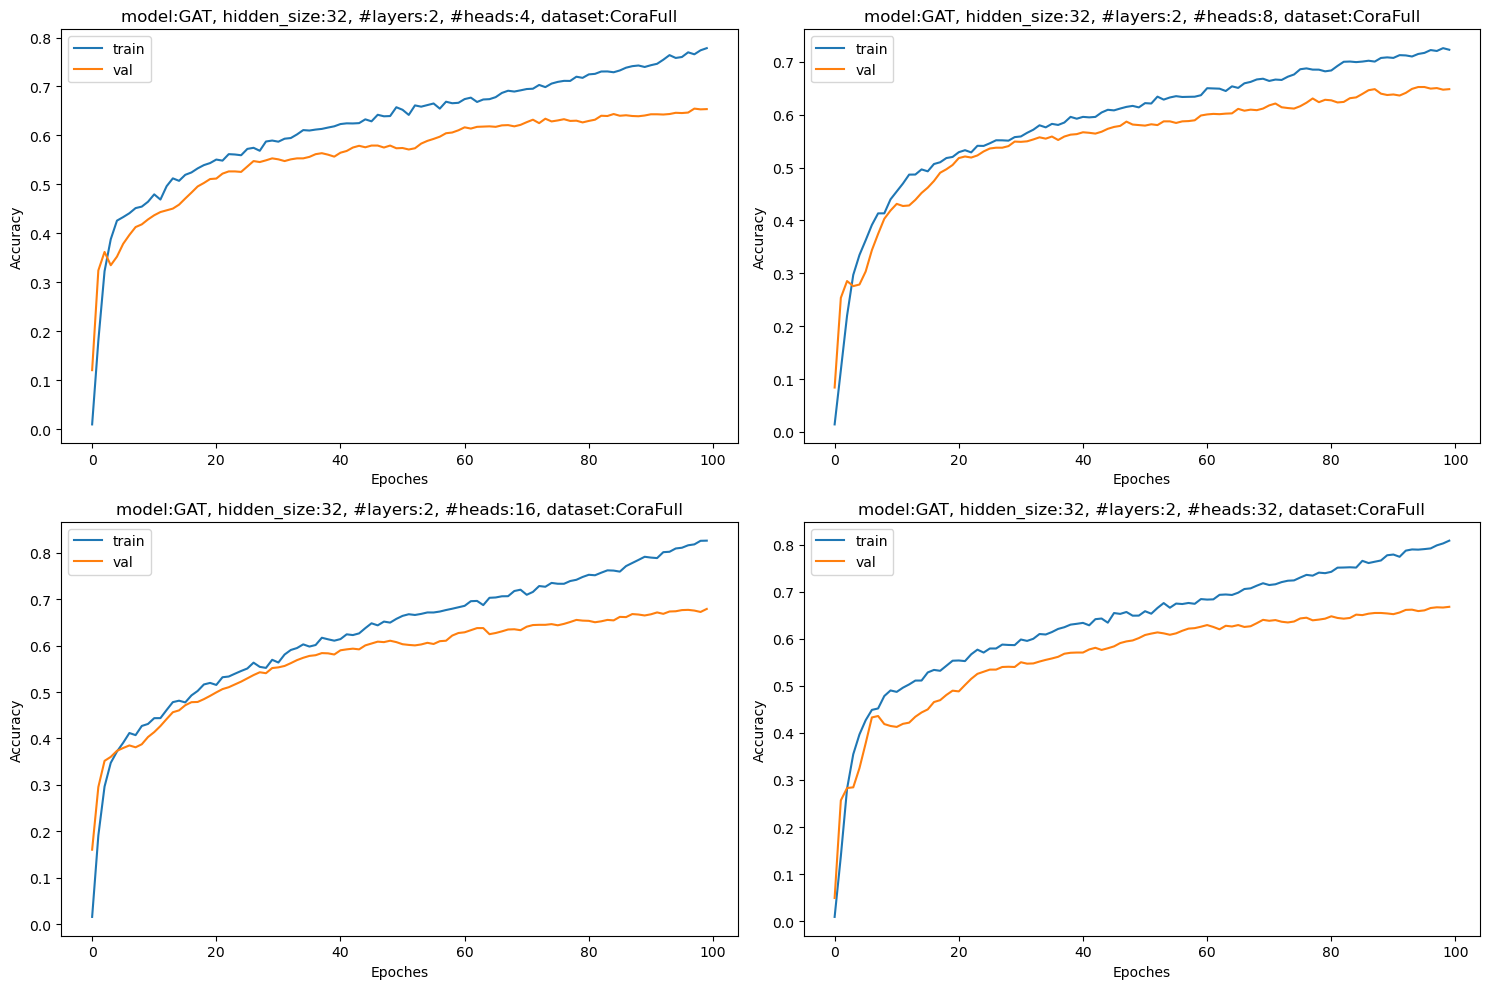

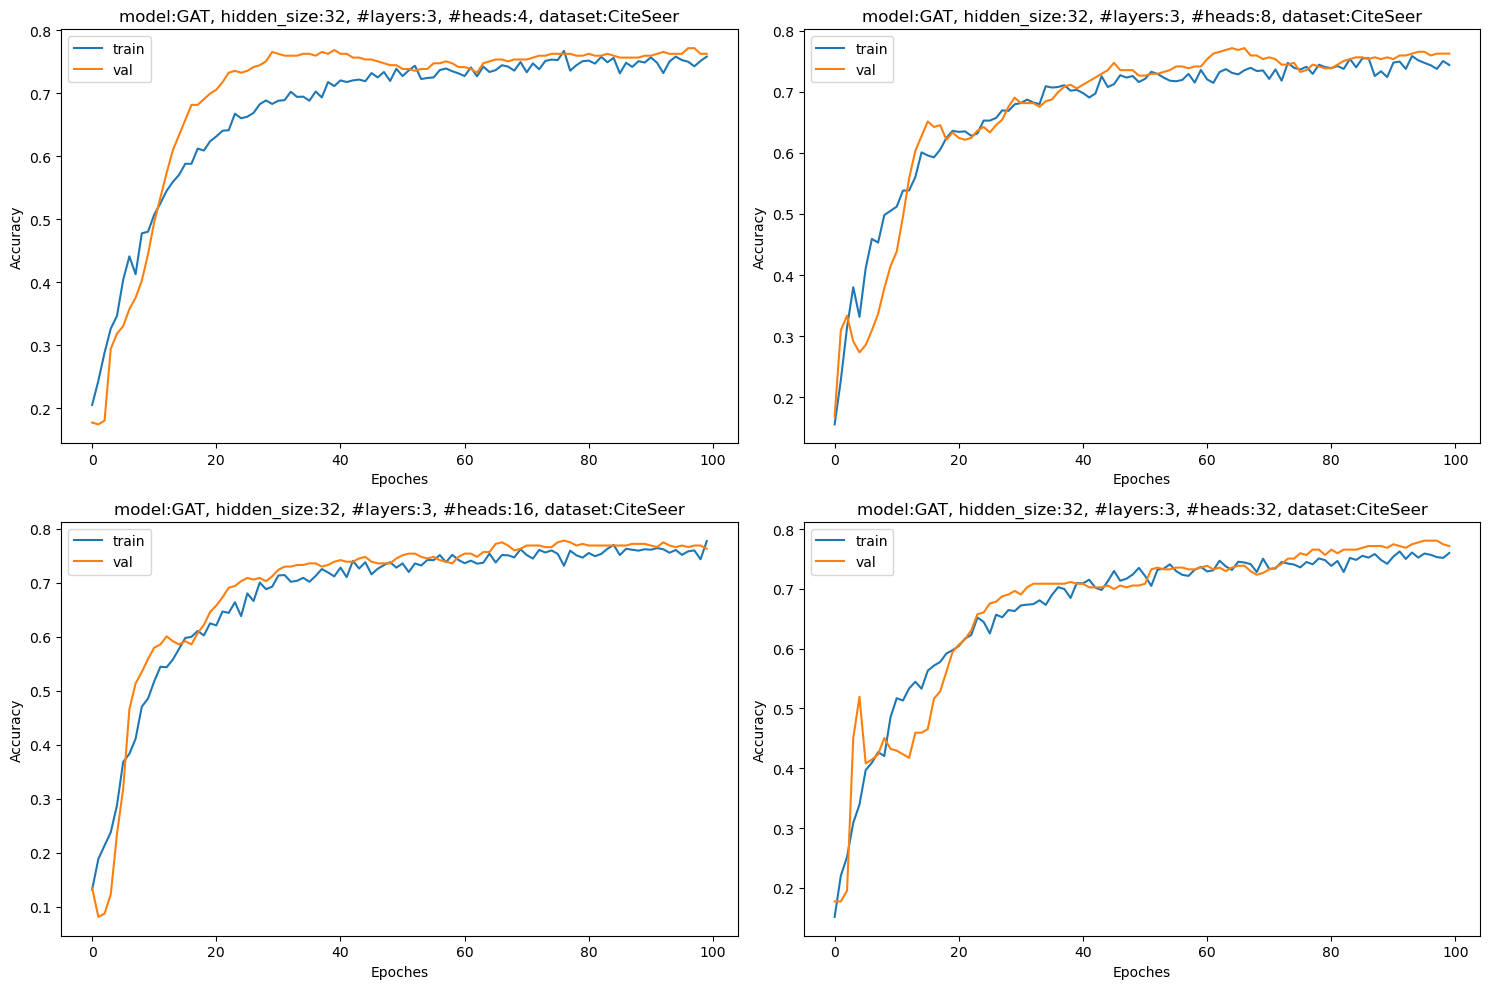

In [53]:
device = "cuda"
GAT_class = GATConv
CoraFull_best_num_layers, CiteSeer_best_num_layers = 2, 3
CoraFull_best_hidden_size, CiteSeer_best_hidden_size = 32, 32
loop = [("CoraFull", CoraFull_dataset, CoraFull_best_num_layers, CoraFull_best_hidden_size), ("CiteSeer", CiteSeer_dataset, CiteSeer_best_num_layers, CiteSeer_best_hidden_size)]
for name, dataset, best_num_layer, best_hidden_size in loop:
    all_plot_data = []
    for i in range(4):
        num_heads = 2**(i+2)
        model = GATModel(GAT_class, dataset["nodes"].shape[1], dataset["num_classes"], best_hidden_size, best_num_layer, num_heads=num_heads).to(device)
        _, train_accuracy, val_accuracy = train_model(model, dataset, device=device)
        plot_data = {"title": f"model:GAT, hidden_size:{best_hidden_size}, #layers:{best_num_layer}, #heads:{num_heads}, dataset:{name}", "data":[{"accuracy": train_accuracy, "name":"train"}, {"accuracy": val_accuracy, "name":"val"}]}
        all_plot_data.append(plot_data)
    plot_accuracy(all_plot_data, num_rows=2, num_cols=2, figure_size=(15, 10))

#### Find accuracy of the best model on test dataset

In [7]:
## test best model
device = "cuda"
GAT_class = GATConv
CoraFull_best_num_layers, CiteSeer_best_num_layers = 2, 3
CoraFull_best_hidden_size, CiteSeer_best_hidden_size = 32, 32
CoraFull_best_num_heads, CiteSeer_best_num_heads = 16, 32
loop = [("CoraFull", CoraFull_dataset, CoraFull_best_num_layers, CoraFull_best_hidden_size, CoraFull_best_num_heads),
          ("CiteSeer", CiteSeer_dataset, CiteSeer_best_num_layers, CiteSeer_best_hidden_size, CiteSeer_best_num_heads)]
for name, dataset, best_num_layer, best_hidden_size, best_num_heads in loop:
    model = GATModel(GAT_class, dataset["nodes"].shape[1], dataset["num_classes"], best_hidden_size, best_num_layer, best_num_heads).to(device)
    t1 = time.time()
    model, _, _ = train_model(model, dataset, device=device)
    train_time = time.time() - t1
    test_indexes = dataset["test_indexes"]
    data = {"nodes":dataset["nodes"].to(device), "edges":dataset["edges"].to(device), "labels":dataset["labels"].to(device)}
    t1 = time.time()
    test_accuracy = evaluate_model(model, data, test_indexes)
    inference_time = time.time() - t1
    print("\t accuracy: {:.4f}".format(test_accuracy))
    print("\t train time: {:.4f} s".format(train_time))
    print("\t inference time: {:.4f} s".format(inference_time))


	 accuracy: 0.6787
	 train time: 65.9651 s
	 inference time: 0.2239 s
	 accuracy: 0.7575
	 train time: 2.9576 s
	 inference time: 0.0091 s


## Question 1.D

#### Find best number of layers and hidden size for GATv2 model

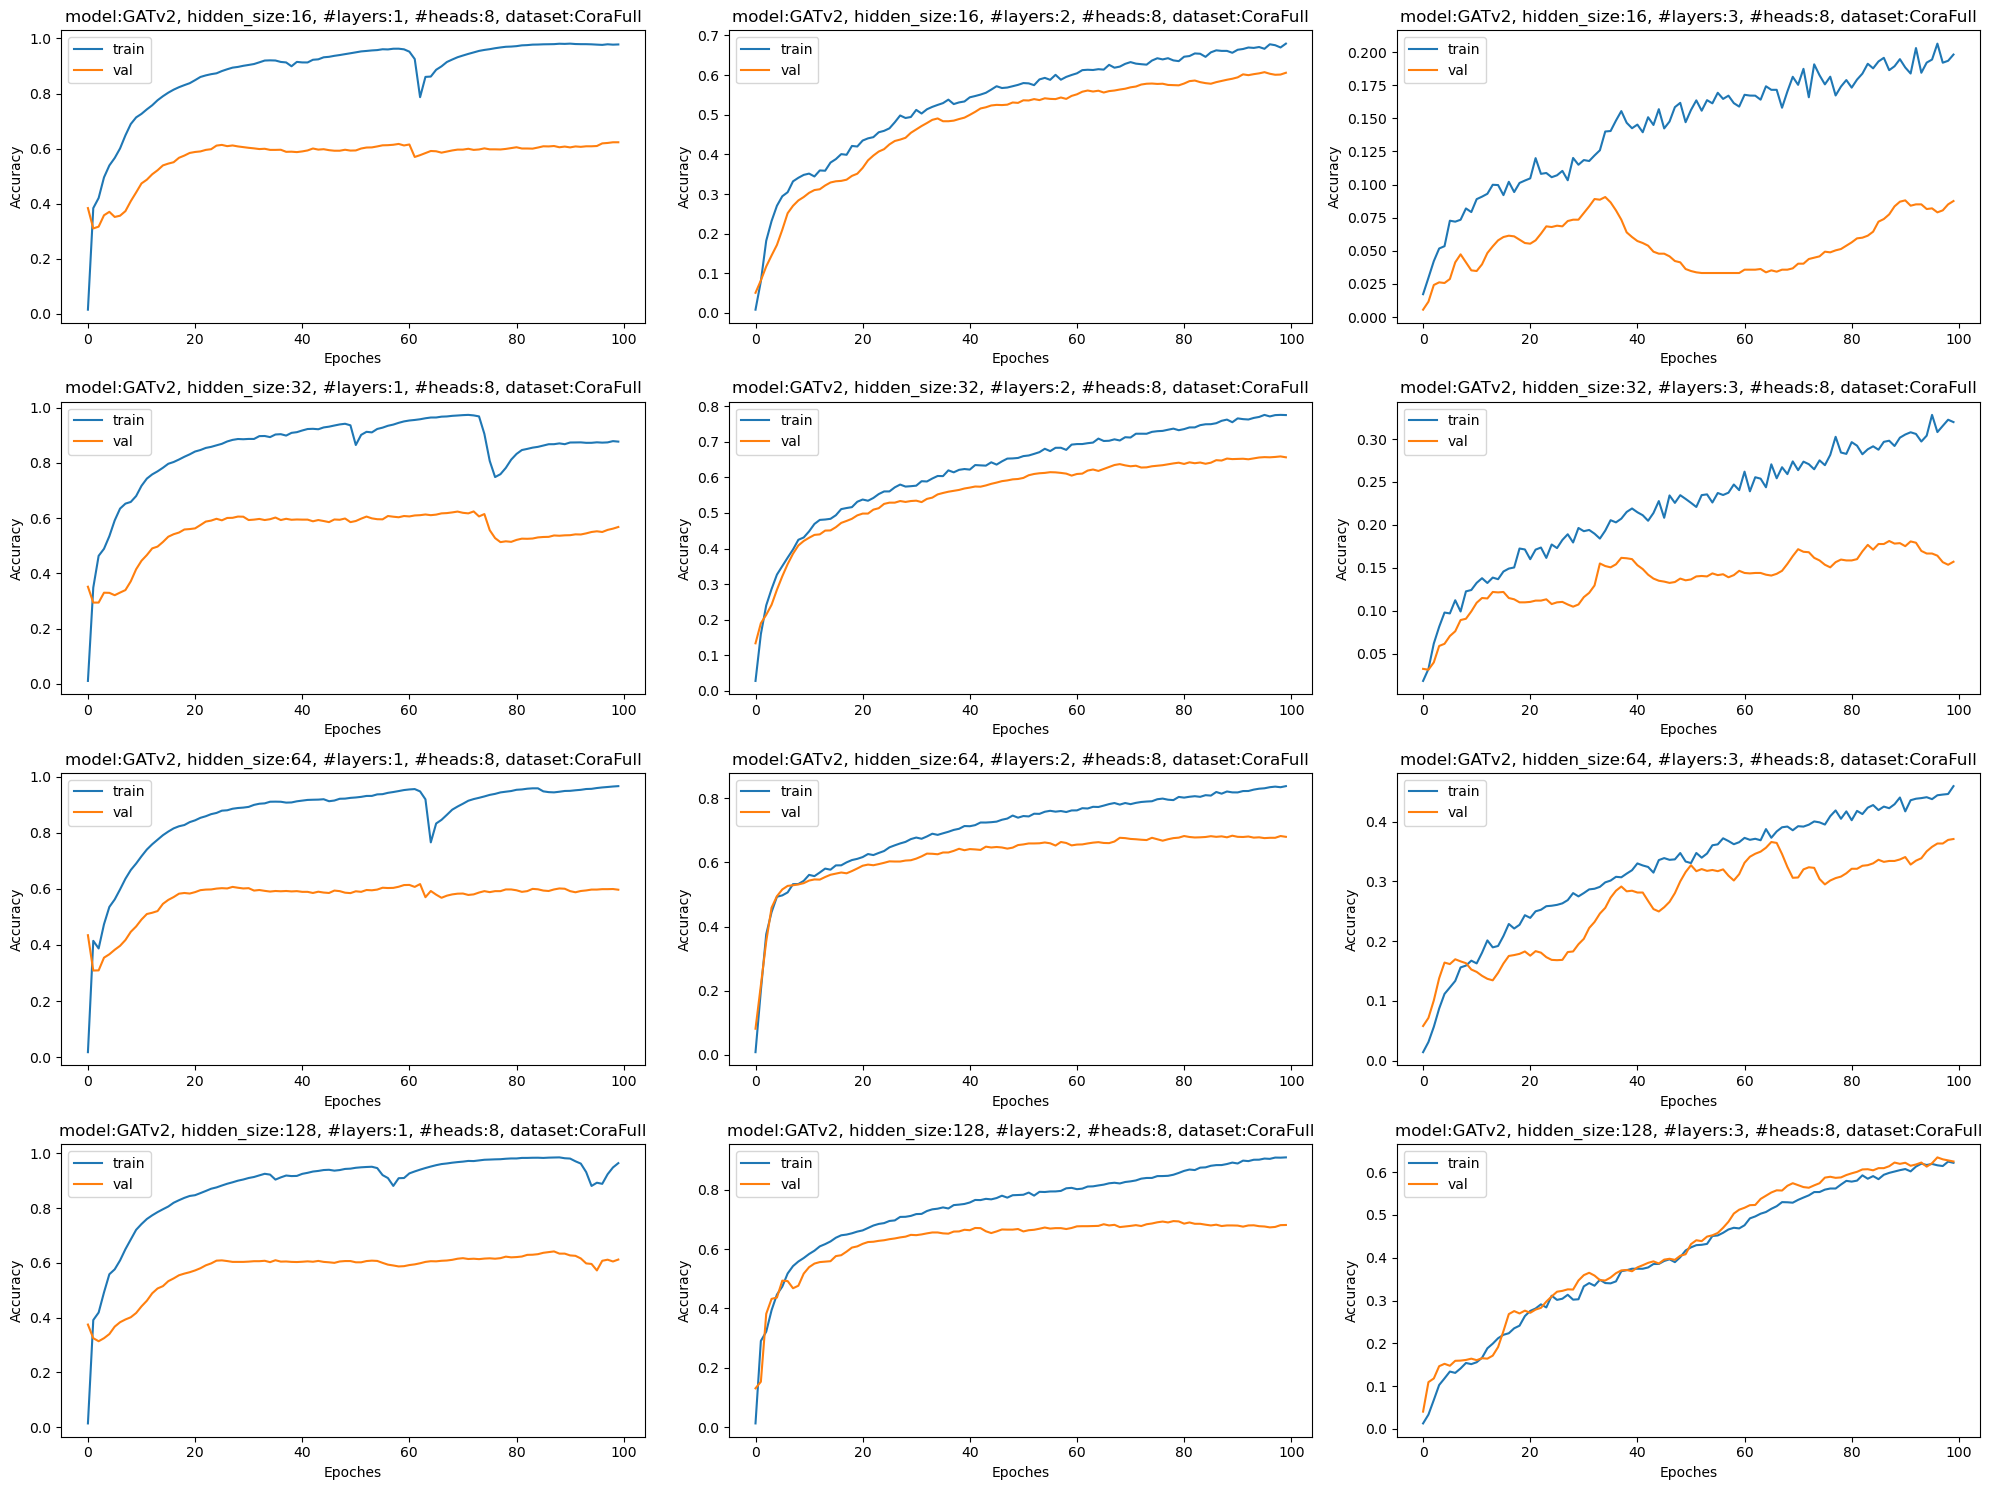

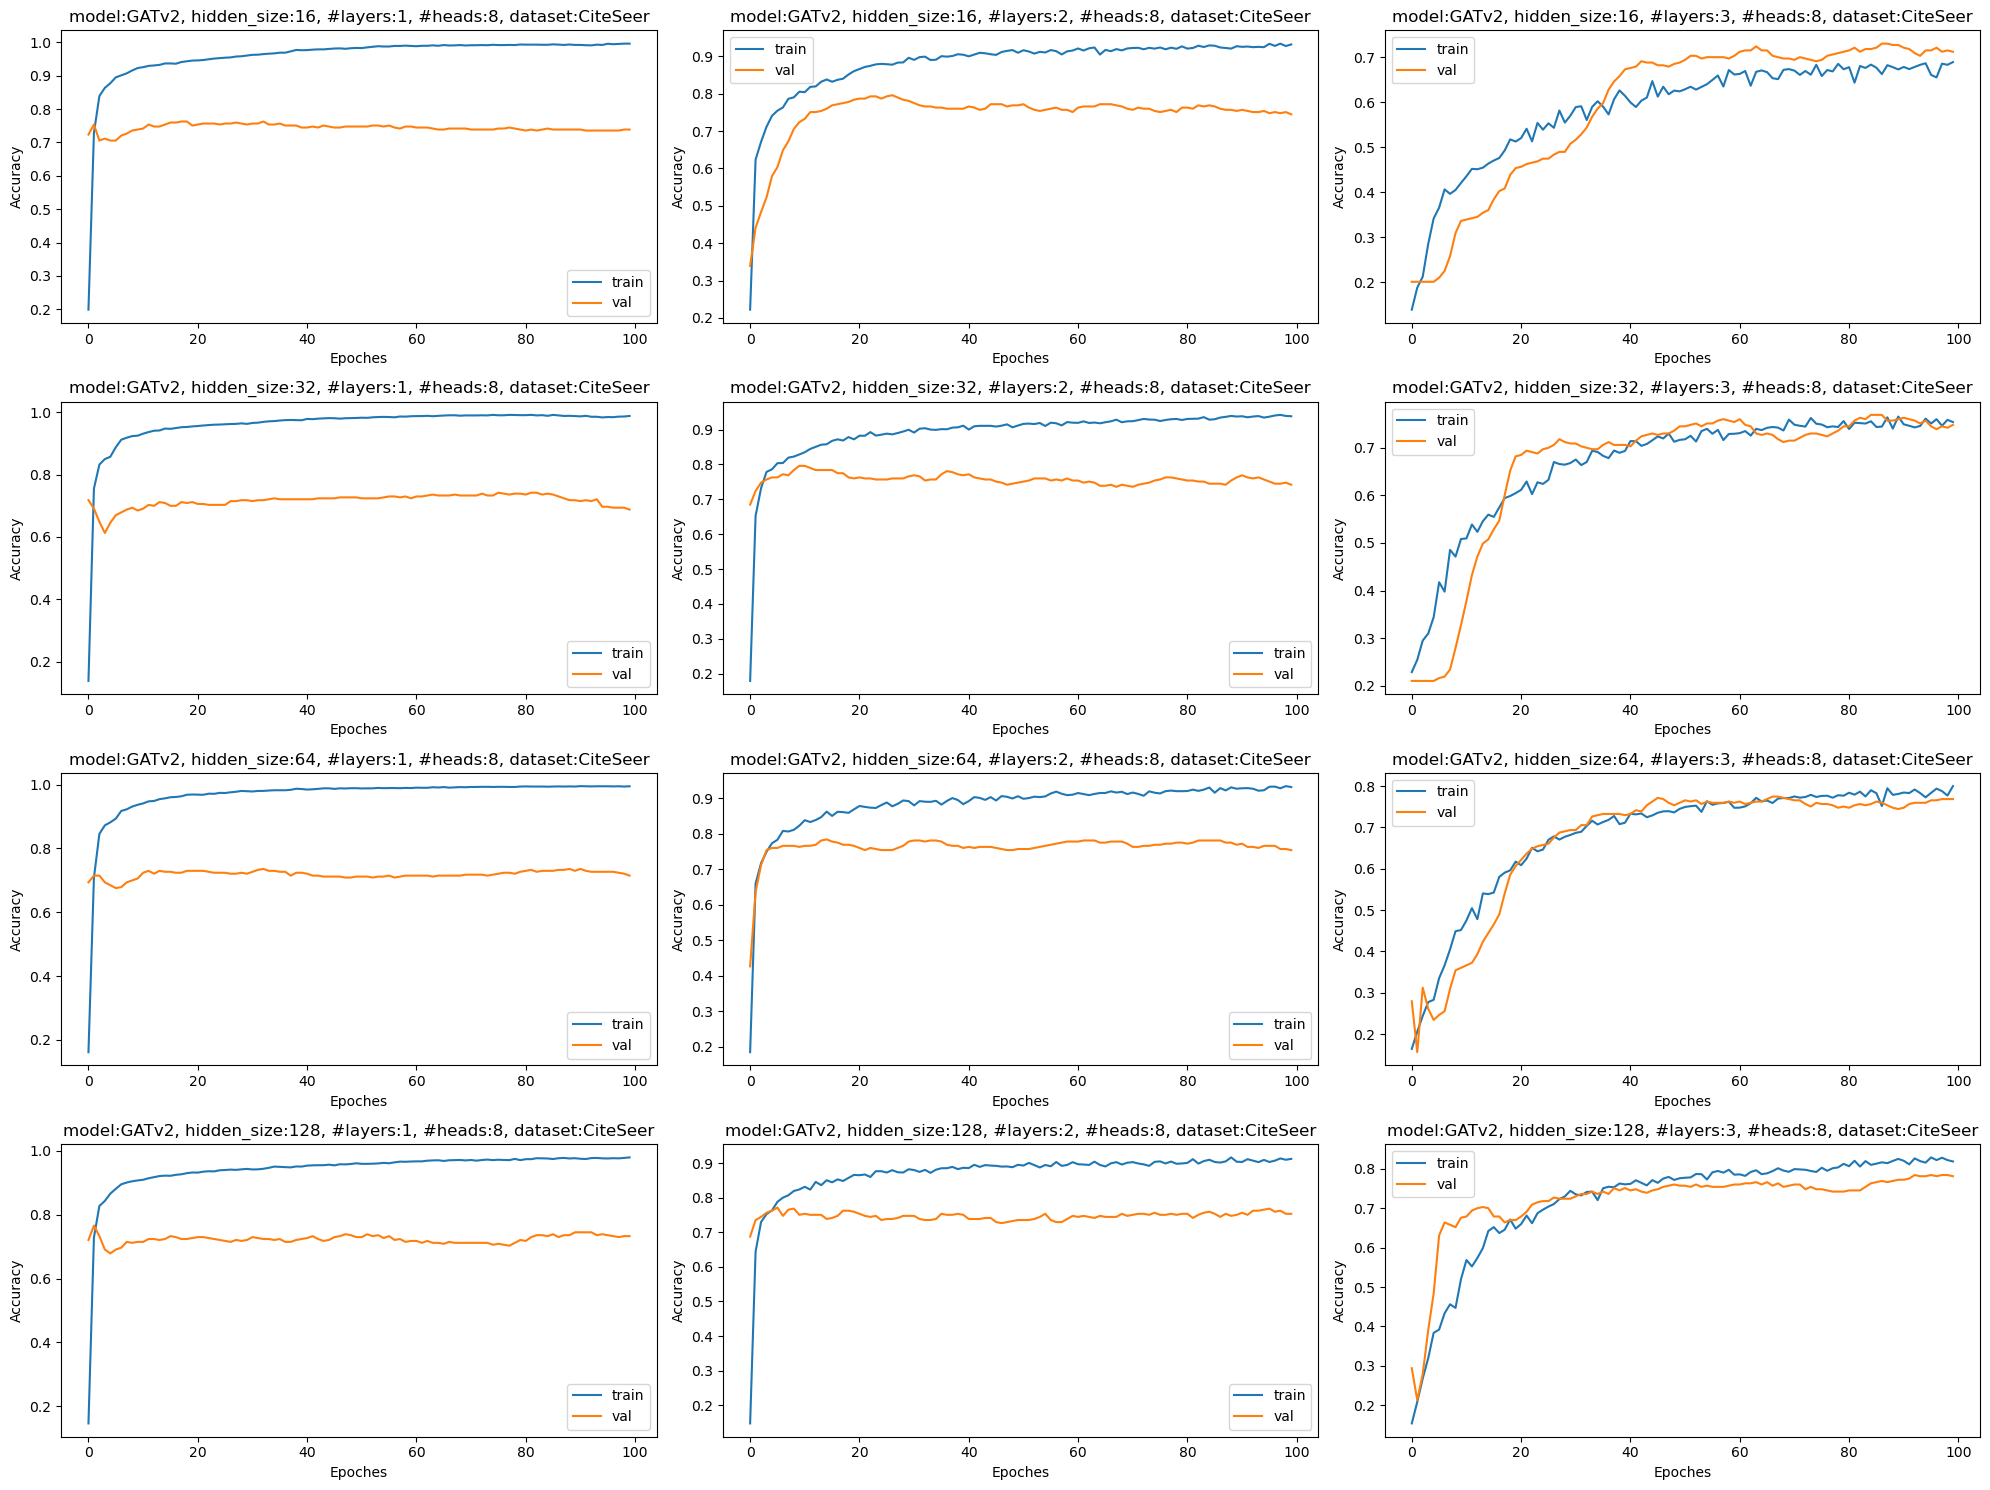

In [55]:
device = "cuda"
GAT_class = GATv2Conv
num_heads = 8
for name, dataset in [("CoraFull", CoraFull_dataset), ("CiteSeer", CiteSeer_dataset)]:
    all_plot_data = []
    for i in range(4):
        hidden_size = 2**(4+i)
        for num_layers in range(1,4):
            model = GATModel(GAT_class, dataset["nodes"].shape[1], dataset["num_classes"], hidden_size, num_layers, num_heads).to(device)
            _, train_accuracy, val_accuracy = train_model(model, dataset, device=device)
            plot_data = {"title": f"model:GATv2, hidden_size:{hidden_size}, #layers:{num_layers}, #heads:{num_heads}, dataset:{name}", "data":[{"accuracy": train_accuracy, "name":"train"}, {"accuracy": val_accuracy, "name":"val"}]}
            all_plot_data.append(plot_data)
    plot_accuracy(all_plot_data, num_rows=4, num_cols=3, figure_size=(20, 15))

#### Find best number of heads

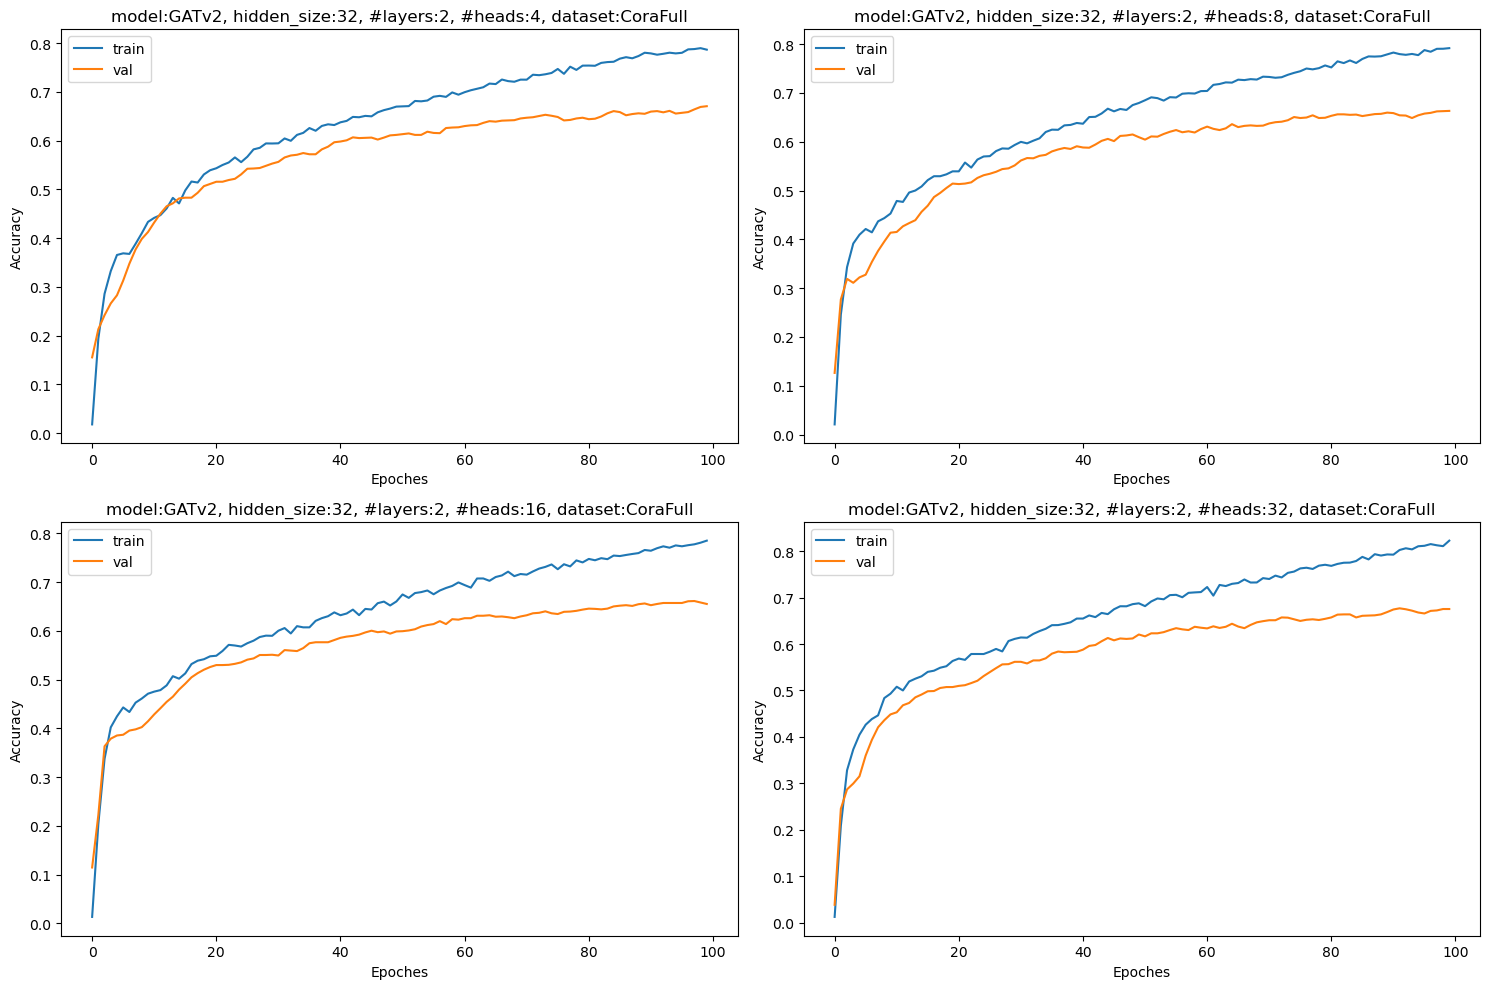

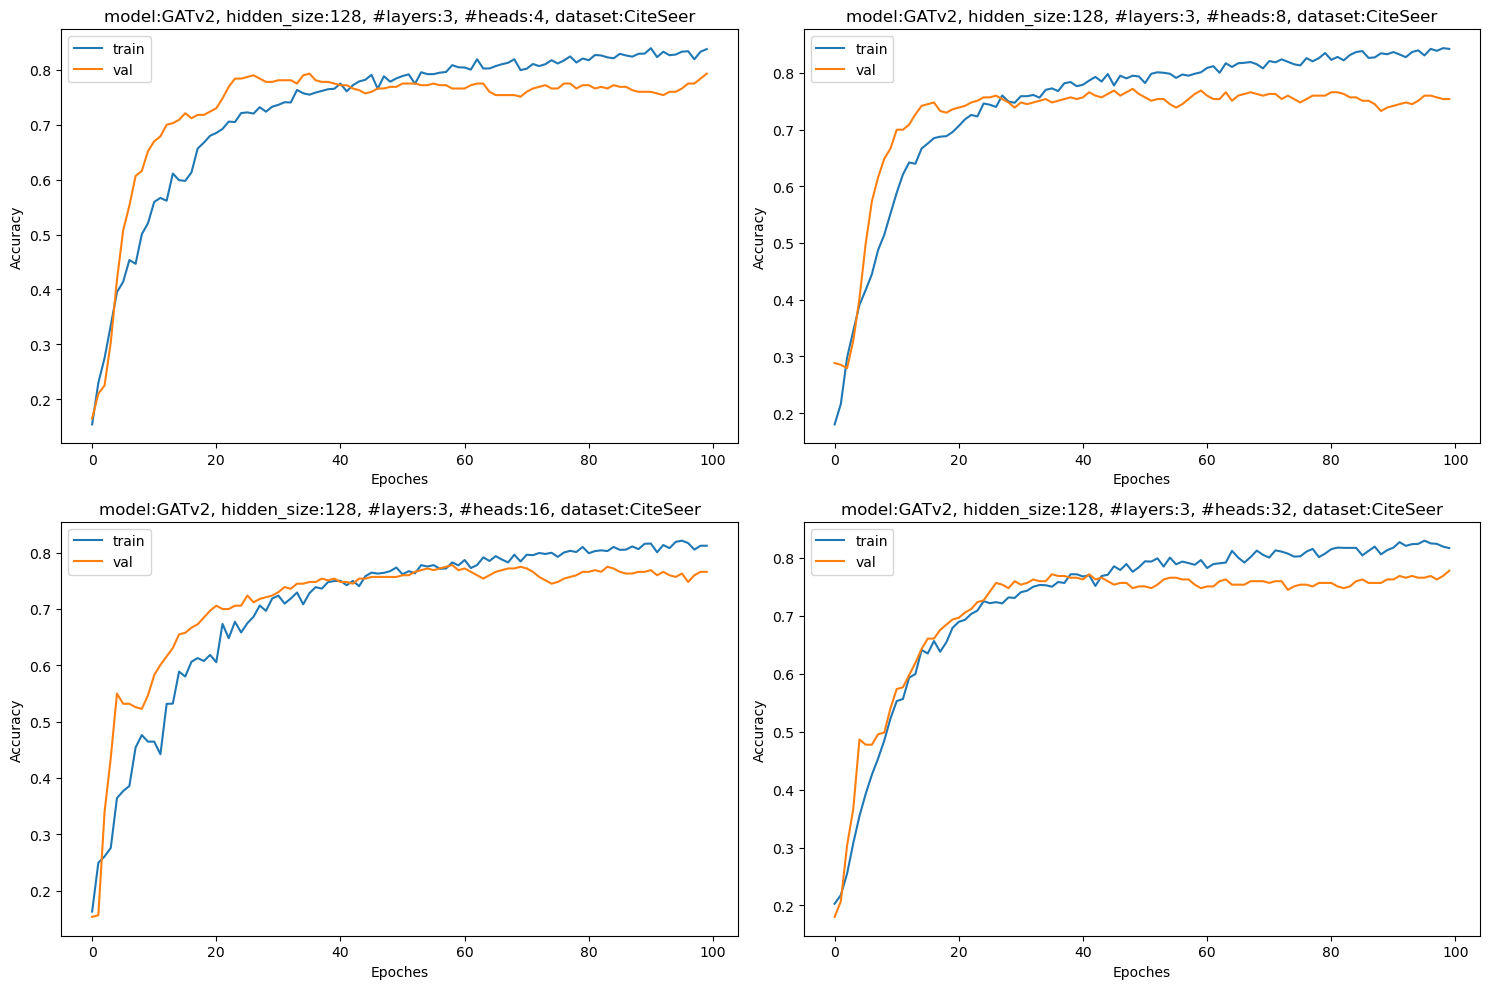

In [6]:
device = "cuda"
GAT_class = GATv2Conv
CoraFull_best_num_layers, CiteSeer_best_num_layers = 2, 3
CoraFull_best_hidden_size, CiteSeer_best_hidden_size = 32, 128
loop = [("CoraFull", CoraFull_dataset, CoraFull_best_num_layers, CoraFull_best_hidden_size), ("CiteSeer", CiteSeer_dataset, CiteSeer_best_num_layers, CiteSeer_best_hidden_size)]
for name, dataset, best_num_layer, best_hidden_size in loop:
    all_plot_data = []
    for i in range(4):
        num_heads = 2**(i+2)
        model = GATModel(GAT_class, dataset["nodes"].shape[1], dataset["num_classes"], best_hidden_size, best_num_layer, num_heads).to(device)
        _, train_accuracy, val_accuracy = train_model(model, dataset, device=device)
        plot_data = {"title": f"model:GATv2, hidden_size:{best_hidden_size}, #layers:{best_num_layer}, #heads:{num_heads}, dataset:{name}", "data":[{"accuracy": train_accuracy, "name":"train"}, {"accuracy": val_accuracy, "name":"val"}]}
        all_plot_data.append(plot_data)
    plot_accuracy(all_plot_data, num_rows=2, num_cols=2, figure_size=(15, 10))

#### Find accuracy of the best model on test dataset

In [6]:
## test best model
device = "cuda"
GAT_class = GATv2Conv
CoraFull_best_num_layers, CiteSeer_best_num_layers = 2, 3
CoraFull_best_hidden_size, CiteSeer_best_hidden_size = 32, 128
CoraFull_best_num_heads, CiteSeer_best_num_heads = 8, 4
loop = [("CoraFull", CoraFull_dataset, CoraFull_best_num_layers, CoraFull_best_hidden_size, CoraFull_best_num_heads),
          ("CiteSeer", CiteSeer_dataset, CiteSeer_best_num_layers, CiteSeer_best_hidden_size, CiteSeer_best_num_heads)]
for name, dataset, best_num_layer, best_hidden_size, best_num_heads in loop:
    model = GATModel(GAT_class, dataset["nodes"].shape[1], dataset["num_classes"], best_hidden_size, best_num_layer, best_num_heads).to(device)
    t1 = time.time()
    model, _, _ = train_model(model, dataset, device=device)
    train_time = time.time() - t1
    test_indexes = dataset["test_indexes"]
    data = {"nodes":dataset["nodes"].to(device), "edges":dataset["edges"].to(device), "labels":dataset["labels"].to(device)}
    t1 = time.time()
    test_accuracy = evaluate_model(model, data, test_indexes)
    inference_time = time.time() - t1
    print("\t accuracy: {:.4f}".format(test_accuracy))
    print("\t train time: {:.4f} s".format(train_time))
    print("\t inference time: {:.4f} s".format(inference_time))

	 accuracy: 0.6752
	 train time: 67.2726 s
	 inference time: 0.2272 s
	 accuracy: 0.7530
	 train time: 3.2058 s
	 inference time: 0.0096 s
